## 1. Generating two classes of random points in a 2D plane

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# generate two classes
num_samples_per_class = 1000 
negative_samples = np.random.multivariate_normal(  
    mean=[0, 3],   
    cov=[[1, 0.5],[0.5, 1]],   
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(  
    mean=[3, 0],   
    cov=[[1, 0.5],[0.5, 1]],  
    size=num_samples_per_class)

# stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples), dtype="float32")


# Generate the corresponding targets (0 and 1)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
             np.ones((num_samples_per_class, 1), dtype="float32")))

targets.shape

(2000, 1)

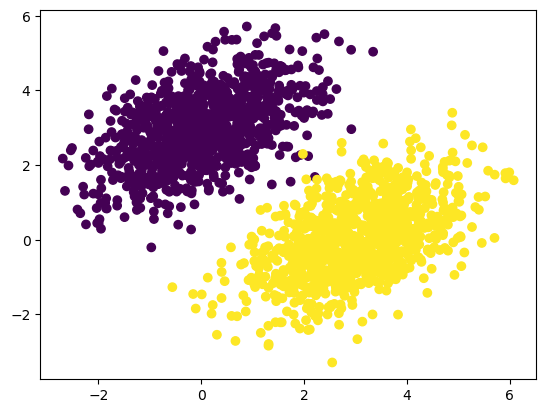

In [3]:
# Plot in matplotlib 
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)
plt.show()


## 2.  Creating the linear classifier variables

In [4]:
# --- Layer Dimensions ---
input_dim = 2   # Number of input features
output_dim = 1  # Number of output neurons

# --- Trainable Parameters ---
# W: The weights matrix, initialized with random values to begin training.
# Its shape (2, 1) maps the inputs to the output.
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))

# b: The bias vector, initialized to zeros. It allows the model to shift its output.
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

print(W.shape)
print(b.shape)

(2, 1)
(1,)


## 3. The forward pass function

In [5]:
def model(inputs):
    return tf.matmul(inputs, W) + b

## 4. The mean sqaared error loss function

In [6]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)   
    return tf.reduce_mean(per_sample_losses) # compute the mean of the loss

## 5. The training step function

In [7]:
# A hyperparameter that controls how large of a step to take during optimization.
learning_rate = 0.1

def training_step(inputs, targets):
    """Performs a single step of gradient descent to update the model's parameters."""
    
    # Use a GradientTape to "record" operations for automatic differentiation.
    with tf.GradientTape() as tape:
        # 1. Forward Pass: Feed inputs through the model to get predictions.
        predictions = model(inputs)
        # 2. Calculate the loss for this batch.
        loss = square_loss(predictions, targets)
        
    # 3. Backward Pass: Retrieve gradients of the loss with respect to W and b.
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    
    # 4. Gradient Descent: Update the model's parameters.
    # assign_sub() is a method in TensorFlow that subtracts a value from a variable 
    # and assigns the result back to the original variable.
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    
    # Return the loss for this step, which is useful for monitoring.
    return loss

## 6. The batch train loop

In [8]:
print(inputs)
print("-----------")
print(targets)

[[-0.45114014  3.268955  ]
 [ 0.9113647   2.290801  ]
 [ 0.2250456   2.8236573 ]
 ...
 [ 3.204433    1.2806411 ]
 [ 4.706946    0.997488  ]
 [ 3.6796176   0.07181231]]
-----------
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [9]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.7953
Loss at step 1: 0.7251
Loss at step 2: 0.2324
Loss at step 3: 0.1531
Loss at step 4: 0.1333
Loss at step 5: 0.1226
Loss at step 6: 0.1139
Loss at step 7: 0.1062
Loss at step 8: 0.0991
Loss at step 9: 0.0927
Loss at step 10: 0.0868
Loss at step 11: 0.0815
Loss at step 12: 0.0766
Loss at step 13: 0.0721
Loss at step 14: 0.0680
Loss at step 15: 0.0643
Loss at step 16: 0.0609
Loss at step 17: 0.0578
Loss at step 18: 0.0550
Loss at step 19: 0.0524
Loss at step 20: 0.0501
Loss at step 21: 0.0479
Loss at step 22: 0.0460
Loss at step 23: 0.0442
Loss at step 24: 0.0426
Loss at step 25: 0.0411
Loss at step 26: 0.0397
Loss at step 27: 0.0385
Loss at step 28: 0.0374
Loss at step 29: 0.0363
Loss at step 30: 0.0354
Loss at step 31: 0.0345
Loss at step 32: 0.0338
Loss at step 33: 0.0331
Loss at step 34: 0.0324
Loss at step 35: 0.0318
Loss at step 36: 0.0313
Loss at step 37: 0.0308
Loss at step 38: 0.0303
Loss at step 39: 0.0299


In [10]:
# The fitted value

print(W.numpy())
print(b.numpy())

[[ 0.17993931]
 [-0.11976268]]
[0.3833383]


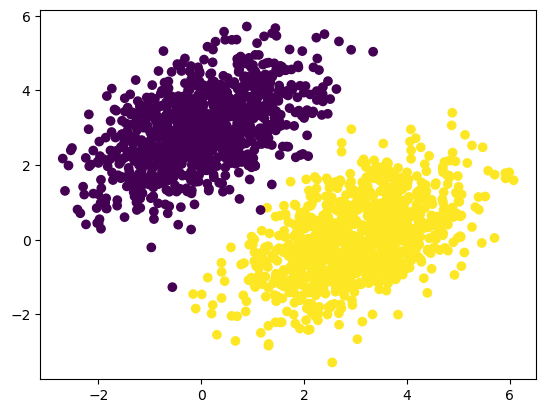

In [11]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

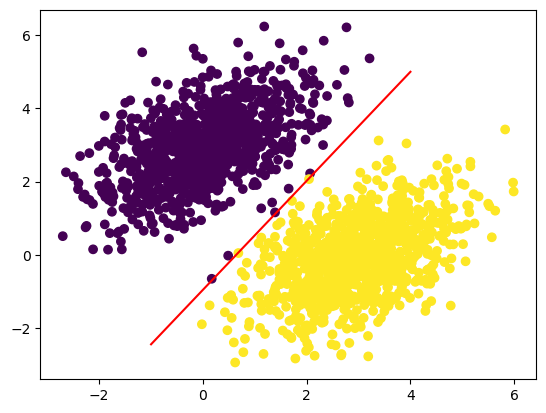

In [ ]:
# Draw the boundary
x = np.linspace(-1, 4, 100)   
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]  
plt.plot(x, y, "-r")           
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)